# 簡単な例
・機械学習の導入として、サンプルデータを用いて、scikit-leranを簡単に動かしてみる

In [4]:
import numpy as np

サンプルデータの中身を確認<br>
１列目が目的変数(結果)<br>
２列めが説明変数(特徴)

In [2]:
with open('2D_example.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-3.269730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-2.931415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,7.582103
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,-6.029489,-1.831199
0,1.116025,3.353602



arrayとして変数に格納

In [5]:
data = np.loadtxt("2D_example.csv", delimiter=",")

In [6]:
data

array([[ 1.      , -7.428476,  1.509903],
       [ 0.      ,  2.980693,  1.960821],
       [ 0.      ,  3.988255,  4.636389],
       [ 1.      , -5.789437, -4.621614],
       [ 1.      , -4.894447, -3.26973 ],
       [ 1.      , -1.933949, -0.047276],
       [ 0.      , -1.611771,  5.932201],
       [ 1.      , -6.670152, -1.036282],
       [ 1.      , -2.931415, -0.104475],
       [ 0.      , -0.074762,  1.070002],
       [ 1.      , -2.691793,  4.168774],
       [ 0.      ,  0.461182,  3.453438],
       [ 0.      , -1.354135,  3.751657],
       [ 1.      , -6.229476, -1.209434],
       [ 0.      ,  2.778594,  7.582103],
       [ 1.      , -5.719578, -0.243509],
       [ 0.      ,  0.928322,  3.20852 ],
       [ 0.      ,  0.850475,  2.908955],
       [ 1.      , -6.029489, -1.831199],
       [ 0.      ,  1.116025,  3.353602]])

説明変数と目的変数をXとYに分離する

In [7]:
y = data[:,0].astype(int) # 1列目がラベル．整数に変換
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [8]:
X = data[:,1:3] # 2,3列目がデータ
X

array([[-7.428476,  1.509903],
       [ 2.980693,  1.960821],
       [ 3.988255,  4.636389],
       [-5.789437, -4.621614],
       [-4.894447, -3.26973 ],
       [-1.933949, -0.047276],
       [-1.611771,  5.932201],
       [-6.670152, -1.036282],
       [-2.931415, -0.104475],
       [-0.074762,  1.070002],
       [-2.691793,  4.168774],
       [ 0.461182,  3.453438],
       [-1.354135,  3.751657],
       [-6.229476, -1.209434],
       [ 2.778594,  7.582103],
       [-5.719578, -0.243509],
       [ 0.928322,  3.20852 ],
       [ 0.850475,  2.908955],
       [-6.029489, -1.831199],
       [ 1.116025,  3.353602]])

サンプルデータをプロットして確認

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

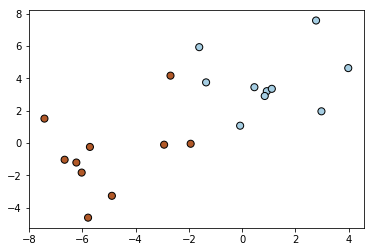

In [10]:
# 2次元散布図でプロット
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')

境界線を引くための関数を準備する

In [11]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

##### ①KNN(K近傍法)の場合

In [ ]:
from sklearn import neighbors
# オブジェクト作成
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

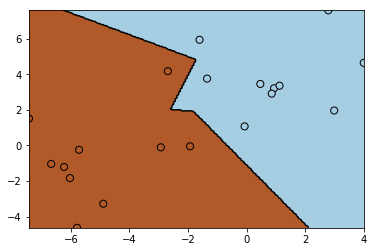

In [11]:
clf.fit(X, y) # 学習
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X, clf) # 境界線の描画

##### ②ロジスティック回帰の場合

In [12]:
from sklearn import linear_model
# オブジェクト作成
clf = linear_model.LogisticRegression()

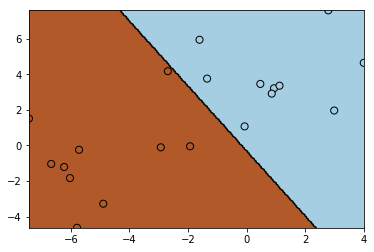

In [13]:
clf.fit(X, y) # 学習
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X, clf) # 境界線の描画

##### ③SVMの場合

In [14]:
from sklearn import svm
# オブジェクト作成
clf = svm.SVC(kernel='linear')

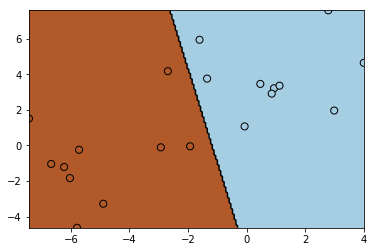

In [15]:
clf.fit(X, y) # 学習
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X, clf) # 境界線の描画

##### ④SVM(rbf)の場合

In [16]:
from sklearn import svm
# オブジェクト作成
clf = svm.SVC(kernel='rbf')

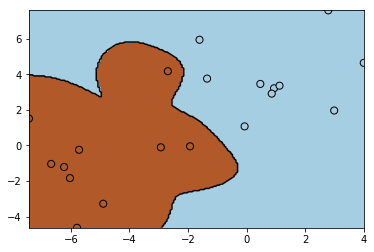

In [17]:
clf.fit(X, y) # 学習
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary(X, clf) # 境界線の描画

# 学習とテストを半々にして実行する
学習した結果を検証するために、全てのデータを使って学習するのではなく、テスト用データを分離して、学習用データだけで学習する

In [12]:
import numpy as np
# ガンのデータを準備
from sklearn.datasets import load_breast_cancer

データを読み込む（ライブラリに用意されているサンプルデータ）

In [13]:
data = load_breast_cancer()
X = data.data # .dataにデータが入っている

データの個数を確認する

In [14]:
X.shape # データ個数×特徴数

(569, 30)

データの詳細な記述を確認することもできる

In [22]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

１つ目のデータを確認すると、３０個の説明変数（特徴）があることがわかる

In [15]:
X[0]

array([  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
         1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
         3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
         7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
         8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
         4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
         3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
         1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
         1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
         2.65400000e-01,   4.60100000e-01,   1.18900000e-01])

特徴の種類を確認できる

In [17]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

目的変数をyに格納する

In [18]:
y = data.target

データの個数はxと同じ

In [19]:
y.shape

(569,)

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [25]:
y[0]

0

データの種類は悪性か良性か

In [21]:
data.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

##### ロジスティック関数を使って機械学習を行う

In [23]:
from sklearn import linear_model

識別器を作成する（インスタンスを作成する）

In [25]:
clf = linear_model.LogisticRegression()

半分を学習用データにして、半分をテスト用データにする

In [26]:
n_samples = X.shape[0] # データの個数
n_samples

569

In [27]:
n_train   = n_samples // 2 # 半分のデータを学習用
n_train

284

In [28]:
n_test    = n_samples - n_train # もう半分をテストデータ用
n_test

285

学習用とテスト用のインデックスを作成してから、そのインデックスを使って、元のデータを学習用とテスト用に分ける

In [29]:
# 0,1,...,n_train-1：最初の半分
train_index = range(0, n_train)
train_index

range(0, 284)

In [31]:
# n_train,n_train+1,...,n_samples-1：残りの半分
test_index  = range(n_train, n_samples)
test_index

range(284, 569)

In [32]:
np.array(train_index), np.array(test_index)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [33]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [34]:
X_train

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.17400000e+01,   1.40200000e+01,   7.42400000e+01, ...,
          8.29000000e-02,   3.10100000e-01,   6.68800000e-02],
       [  1.94000000e+01,   1.81800000e+01,   1.27200000e+02, ...,
          2.25200000e-01,   3.59000000e-01,   7.78700000e-02],
       [  1.62400000e+01,   1.87700000e+01,   1.08800000e+02, ...,
          1.73200000e-01,   2.77000000e-01,   1.06300000e-01]])

学習用データを使って学習する

In [35]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

学習データを使って精度を確認する（学習データで学習しているため精度が高いのはあたりまえ）

In [36]:
print(clf.score(X_train, y_train))

0.964788732394


テストデータを使って精度を確認する（未知のデータなので、上と比べると精度が下がる）

In [37]:
print(clf.score(X_test, y_test))

0.947368421053


predict関数を使うと識別器を使った識別を行うことができる

In [38]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1])

# アヤメのデータを識別
別のデータを使って同じことをやる（ダメな例）。今回はアヤメ（花）の分類を行う。目的変数は３つある。

In [40]:
import numpy as np
from sklearn.datasets import load_iris

In [41]:
data = load_iris()
X = data.data
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

dirで使える情報の一覧を確認することができる

In [43]:
dir(data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

データの個数を確認

In [44]:
X.shape # データ個数×特徴数

(150, 4)

In [45]:
X[0]

array([ 5.1,  3.5,  1.4,  0.2])

特徴の内容を確認

In [46]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

目的変数を確認する

In [47]:
y = data.target # .targetにラベルが入っている

In [48]:
y.shape # データ個数

(150,)

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
y[0] # 最初のデータのラベル

0

In [51]:
data.target_names # ラベルの意味

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

##### 検証（ロジスティック回帰）

In [55]:
from sklearn import linear_model

インスタンス作成

In [56]:
clf = linear_model.LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

学習用とテストデータに分けて学習

In [57]:
n_samples = X.shape[0] # データの個数
n_train   = n_samples // 2 # 半分のデータを学習
n_test    = n_samples - n_train # テストデータ数

In [58]:
# 0,1,...,n_train-1：最初の半分を学習データのインデックスに
train_index = range(0, n_train)
# n_train,n_train+1,...,n_samples-1：残りの半分をテストデータのインデックスに
test_index  = range(n_train, n_samples)
np.array(train_index), np.array(test_index) # 確認してみる

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149]))

In [59]:
X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

In [60]:
clf.fit(X_train, y_train); # 識別器の学習

精度を確認してみると全然ダメなことがわかる。（目的変数が３つなので適当にやっても３３％。。）

In [61]:
print(clf.score(X_train, y_train)) # 学習データの精度

1.0


In [62]:
print(clf.score(X_test, y_test)) # テストデータの精度

0.333333333333


目的変数を見てみると、偏りがあることがわかる。（偏ったデータで学習したことになる）

In [66]:
y_train, y_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]))

##### インデックスの分け方を工夫してみる

ShuffleSplitを使うとランダムにシャッフルして，学習・テストに分割するためのインデックスを作成してくれる

In [68]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,      # 分割を1個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

シャッフルしたインデックスを格納する

In [72]:
train_index, test_index = next(ss.split(X)) 

In [73]:
list(train_index), list(test_index) # 確認してみる

([3,
  149,
  98,
  6,
  68,
  109,
  96,
  12,
  102,
  120,
  104,
  128,
  46,
  11,
  110,
  124,
  41,
  148,
  1,
  113,
  139,
  42,
  4,
  129,
  17,
  38,
  5,
  53,
  143,
  105,
  0,
  34,
  28,
  55,
  75,
  35,
  23,
  74,
  31,
  118,
  57,
  131,
  65,
  32,
  138,
  14,
  122,
  19,
  29,
  130,
  49,
  136,
  99,
  82,
  79,
  115,
  145,
  72,
  77,
  25,
  81,
  140,
  142,
  39,
  58,
  88,
  70,
  87,
  36,
  21,
  9,
  103,
  67,
  117,
  47],
 [114,
  62,
  33,
  107,
  7,
  100,
  40,
  86,
  76,
  71,
  134,
  51,
  73,
  54,
  63,
  37,
  78,
  90,
  45,
  16,
  121,
  66,
  24,
  8,
  126,
  22,
  44,
  97,
  93,
  26,
  137,
  84,
  27,
  127,
  132,
  59,
  18,
  83,
  61,
  92,
  112,
  2,
  141,
  43,
  10,
  60,
  116,
  144,
  119,
  108,
  69,
  135,
  56,
  80,
  123,
  133,
  106,
  146,
  50,
  147,
  85,
  30,
  101,
  94,
  64,
  89,
  91,
  125,
  48,
  13,
  111,
  95,
  20,
  15,
  52])

インデックスを使ってデータを分割する

In [75]:
X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

目的変数をバラけ方を確認するとうまくバラバラになっていることを確認できる

In [76]:
y_train, y_test

(array([0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
        2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0,
        2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0,
        0, 0, 2, 1, 2, 0]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
        0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
        2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0,
        0, 2, 1, 0, 0, 1]))

学習して精度を確認すると改善していることがわかる

In [77]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
print(clf.score(X_train, y_train))

0.92


In [79]:
print(clf.score(X_test, y_test))

0.84


In [80]:
clf.predict(X_test), y_test

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
        0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1,
        2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0,
        0, 2, 1, 0, 0, 1]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
        0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
        2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0,
        0, 2, 1, 0, 0, 1]))

# 複数回繰り返して平均をとる

In [81]:
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(X): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
    y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train)         # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)

scores = np.array(scores)
print(scores)

[ 0.84        0.93333333  0.90666667  1.          0.90666667  0.93333333
  0.94666667  1.          0.90666667  0.88      ]


In [81]:
scores.mean() # 平均

0.92533333333333334

In [82]:
scores.std() # 標準偏差

0.047027178902795737

In [83]:
print("{0} +/- {1}".format(scores.mean(), scores.std()))

0.9253333333333333 +/- 0.04702717890279574


In [84]:
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

92.53 +/- 4.70 %


##### プロットする

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# 学習データの分量を0.1, 0.2, ..., 0.9に
train_sizes = np.arange(0.1, 1.0, 0.1)

In [87]:
all_mean = []
all_std  = []

for train_size in train_sizes:

    ss = ShuffleSplit(n_splits=100,
                      train_size=train_size,
                      test_size=1-train_size)

    scores = []
    for train_index, test_index in ss.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, 
                                                                scores.mean() * 100, 
                                                                scores.std()  * 100))
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

train_size 10%: 76.87 +/- 10.53 %
train_size 20%: 85.18 +/- 10.28 %
train_size 30%: 87.38 +/- 8.32 %
train_size 40%: 91.09 +/- 6.03 %
train_size 50%: 92.77 +/- 4.58 %
train_size 60%: 93.82 +/- 4.44 %
train_size 70%: 94.51 +/- 3.84 %
train_size 80%: 95.43 +/- 3.39 %
train_size 90%: 94.00 +/- 6.63 %


↑学習データが多いほうが精度が高い

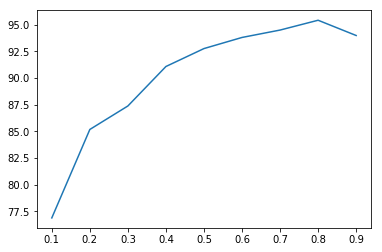

In [88]:
plt.plot(train_sizes, all_mean)

(0, 1)

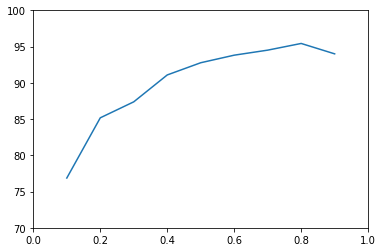

In [89]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)

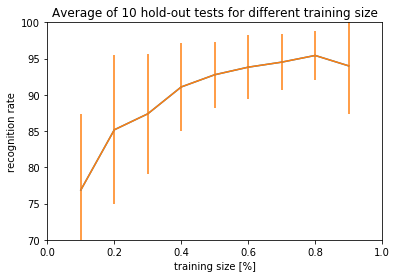

In [90]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)
# 標準偏差も表示
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")